In [1]:
# importing libraries 
import keras
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K
from keras.models import load_model
import cv2
import numpy as np
from keras import callbacks

In [2]:
train_data_dir = '/content/drive/MyDrive/Remote sensing through Deep Neural Networks for satellite image classification/Data/Train data'
validation_data_dir = '/content/drive/MyDrive/Remote sensing through Deep Neural Networks for satellite image classification/Data/Test data'

#initializing data

img_width, img_height = 20, 20
nb_train_samples = 801
nb_validation_samples = 199
epochs = 40
batch_size = 5

#deciding shape of the image

if K.image_data_format() == 'channels_first': 
    input_shape = (3, img_width, img_height) 
else: 
    input_shape = (img_width, img_height, 3)

In [3]:
#building the neural network
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#                                                                          SGD-Optimizer
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape = input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Conv2D(32, (2, 2), input_shape = input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Conv2D(64, (2, 2), input_shape = input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2)))
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.1))

model.add(Dense(4))
model.add(Activation('sigmoid'))

#compiling the neural network

optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss ='binary_crossentropy', 
                     optimizer = optimizer, 
                   metrics =['accuracy']) 

#image generator

train_datagen = ImageDataGenerator( 
                rescale = 1. / 255, 
                 shear_range = 0.2, 
                  zoom_range = 0.2, 
            horizontal_flip = True) 
test_datagen = ImageDataGenerator(rescale = 1. / 255)

#train generator
  
train_generator = train_datagen.flow_from_directory(train_data_dir, 
                              target_size =(img_width, img_height), 
                     batch_size = batch_size, class_mode ='categorical',color_mode='rgb', shuffle=True) 
  
validation_generator = test_datagen.flow_from_directory( 
                                    validation_data_dir, 
                   target_size =(img_width, img_height), 
          batch_size = batch_size, class_mode ='categorical',color_mode='rgb', shuffle=True)

#to avoid overfitting

early_stopping_monitor = callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')

#creating a checkpoint

model_checkpoint = callbacks.ModelCheckpoint('/content/drive/MyDrive/Remote sensing through Deep Neural Networks for satellite image classification/Best_Model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

#fiting the model

history = model.fit(train_generator, 
    steps_per_epoch = nb_train_samples // batch_size, 
    epochs = epochs, validation_data = validation_generator, 
    validation_steps = nb_validation_samples // batch_size,verbose=1,callbacks=[early_stopping_monitor,model_checkpoint])

Found 801 images belonging to 4 classes.
Found 199 images belonging to 4 classes.
Epoch 1/40
160/160 [==============================] - 43s 175ms/step - loss: 0.5986 - accuracy: 0.2957 - val_loss: 0.5393 - val_accuracy: 0.3744

Epoch 00001: val_loss improved from inf to 0.53929, saving model to /content/drive/MyDrive/Remote sensing through Deep Neural Networks for satellite image classification/Best_Model.h5
Epoch 2/40
160/160 [==============================] - 27s 169ms/step - loss: 0.5227 - accuracy: 0.4421 - val_loss: 0.4075 - val_accuracy: 0.6051

Epoch 00002: val_loss improved from 0.53929 to 0.40750, saving model to /content/drive/MyDrive/Remote sensing through Deep Neural Networks for satellite image classification/Best_Model.h5
Epoch 3/40
160/160 [==============================] - 27s 171ms/step - loss: 0.4046 - accuracy: 0.5954 - val_loss: 0.3828 - val_accuracy: 0.6051

Epoch 00003: val_loss improved from 0.40750 to 0.38277, saving model to /content/drive/MyDrive/Remote sensin

Loss
 [0.5648810267448425, 0.4832354485988617, 0.4049535095691681, 0.3779890239238739, 0.36940351128578186, 0.35329800844192505, 0.3328602910041809, 0.3277306854724884, 0.2987610995769501, 0.2879997193813324, 0.28202420473098755, 0.25225573778152466, 0.23634204268455505, 0.22561636567115784, 0.22242580354213715, 0.20157316327095032, 0.21179862320423126, 0.1970973014831543, 0.18851900100708008]
Validation Loss
 [0.5392941236495972, 0.407504141330719, 0.382771372795105, 0.3702258765697479, 0.33682334423065186, 0.3183007836341858, 0.40758460760116577, 0.30820342898368835, 0.25058895349502563, 0.2495621144771576, 0.2624801695346832, 0.2507874071598053, 0.22706148028373718, 0.3791687786579132, 0.29871466755867004, 0.18293331563472748, 0.2593238651752472, 0.24041487276554108, 0.19432631134986877]
Accuracy [0.3429648280143738, 0.49623116850852966, 0.5979899764060974, 0.6130653023719788, 0.6168341636657715, 0.6532663106918335, 0.679648220539093, 0.6846733689308167, 0.733668327331543, 0.7512562

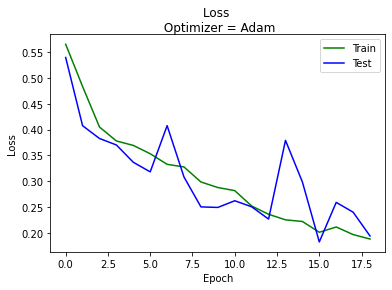

########################   Accuracy  #########################




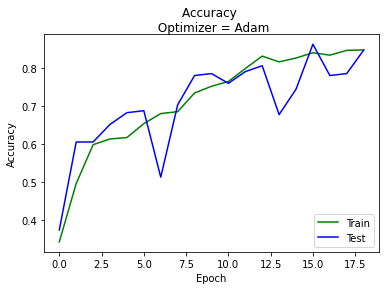

In [4]:
import matplotlib.pyplot as plt

print("Loss\n",history.history['loss'])
print("Validation Loss\n",history.history['val_loss'])
print("Accuracy",history.history['accuracy'])
print("Validation Accuracy",history.history['val_accuracy'])

#Loss 

print("########################   Loss  #########################\n\n")
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], color='green')
plt.plot(history.history['val_loss'], color='blue')
plt.legend(['Train', 'Test'], loc='upper right')
plt.title('Loss \n Optimizer = Adam', pad=-50)
plt.show()

# Accuracy

print("########################   Accuracy  #########################\n\n")
plt.figure()
plt.plot(history.history['accuracy'], color='green')
plt.plot(history.history['val_accuracy'], color='blue')
plt.title('Accuracy \n Optimizer = Adam', pad=-75)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')

plt.show()